In [3]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial



## Lagrange interpolation

In [4]:
rng = np.random.default_rng()
n = 3

X = rng.uniform(size=n)
Y = rng.uniform(size=n)
M = np.empty((n,n))




In [16]:
def phi0(x0,x1,x2): # We could pass X = [x0, x1, x2] instead
    P1 = Polynomial([-x1/(x0-x1), 1/(x0-x1)])
    P2 = Polynomial([-x2/(x0-x2), 1/(x0-x2)])
    return P1 * P2
    
def phi1(x0,x1,x2):
    P0 = Polynomial([-x0/(x1-x0), 1/(x1-x0)])
    P2 = Polynomial([-x2/(x1-x2), 1/(x1-x2)])
    return P0 * P2
    
def phi2(x0,x1,x2):
    P0 = Polynomial([-x0/(x2-x0), 1/(x2-x0)])
    P1 = Polynomial([-x1/(x2-x1), 1/(x2-x1)])
    return P0 * P1
    

x0 = -1
x1 = 0

x2 = 1
p0 = phi0(x0, x1, x2)
print(p0(x0), p0(x1), p0(x2))
p1 = phi1(x0, x1, x2)
print(p1(x0), p1(x1), p1(x2))
p2 = phi2(x0, x1, x2)
print(p2(x0), p2(x1), p2(x2))

def Lagrange2(f, x0, x1, x2): # instead of pasing x0, x1, x2, pass a vector of X
    return f(x0) * phi0(x0, x1, x2) # Find a way to directly compute phi0, phi1, phi_i
         + f(x1) * phi1(x0, x1, x2) # diurectly using the polynomial class
         + f(x2) * phi2(x0, x1, x2)
    


1.0 0.0 0.0
0.0 1.0 0.0
0.0 0.0 1.0


In [30]:
# Trick: normalization
# given X = [x0, x1, x2, ... xn-1]
# compute P st P(x0) = p(x1) = ... = P(x_n-2) = 0
# and P(x_n-1) = 1
X = [-1, 2, 4, 2, -9]
P = Polynomial.fromroots(X[:-1])
P = P/P(X[-1])

for x in X:
    print(P(x))

    

0.0
-2.168404344971009e-19
-3.469446951953614e-18
-2.168404344971009e-19
1.0


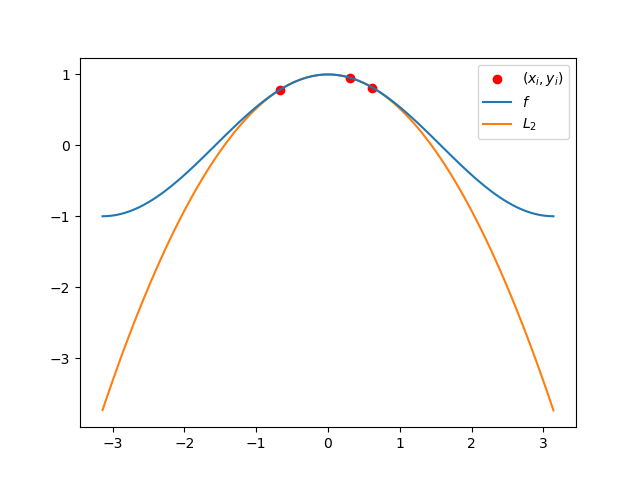

In [27]:
def f(x):
    return np.cos(x)
X = rng.uniform(low = -np.pi/4, high = np.pi/4, size=3)

L2 = Lagrange2(f, X[0], X[1], X[2])
XX = np.linspace(-np.pi, np.pi, 101)
fig, ax = plt.subplots()
ax.scatter(X,f(X),color='red',label = r'$(x_i,y_i)$',zorder = 1)
ax.plot(XX, f(XX), label = r'$f$', zorder = 1)
ax.plot(XX, L2(XX), label = r'$L_2$', zorder = 0)
# 
ax.legend(loc=0)

1.35507597 + 1.05943429·x - 3.2712662·x²


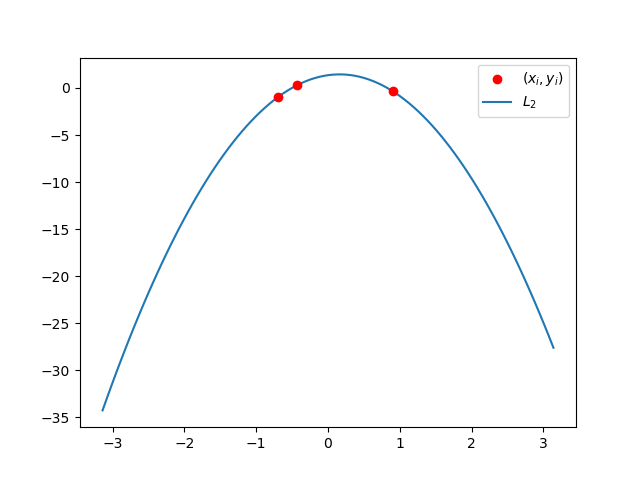

In [38]:
X = rng.uniform(low = -1, high = 1, size=3)
Y = rng.uniform(low = -1, high = 1, size=3)

M = np.array([[1, X[0], X[0]**2],
              [1, X[1], X[1]**2],
              [1, X[2], X[2]**2]])
b = np.array([Y[0], Y[1], Y[2]]
            )

coef = np.linalg.solve(M,b)
L2 = Polynomial(coef)
print(L2)

XX = np.linspace(-np.pi, np.pi, 101)
fig, ax = plt.subplots()
ax.scatter(X,Y,color='red',label = r'$(x_i,y_i)$',zorder = 1)

ax.plot(XX, L2(XX), label = r'$L_2$', zorder = 0)
# 
ax.legend(loc=0)


## Hermitte interpolation

In [72]:
rng = np.random.default_rng()
X = rng.uniform(size=2)
X = [-1,1]
Y = rng.uniform(size=4)
p = rng.uniform(low=-1, high=1, size=2)
q = rng.uniform(low=-5, high=5, size=2)
M = np.empty((n,n))
H = Polynomial(np.linalg.solve(M,Y))

0.5967931 - 0.84106575·x + 0.00575154·x² + 0.49377035·x³
0.9498400417200233 0.9498400417200233
0.2552492498430402 0.2552492498430403
0.6287422280625032 0.6287422280625033
0.6517483954828791 0.6517483954828792


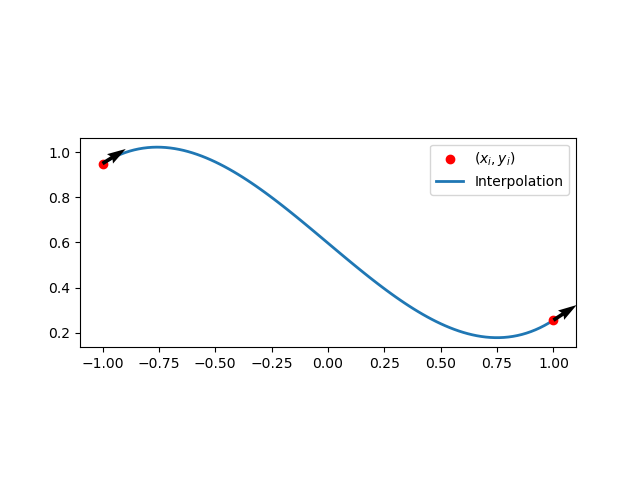

In [74]:
fig, ax = plt.subplots()
ax.scatter(X,Y[0:2],color='red',label = r'$(x_i,y_i)$',zorder = 1)
ax.quiver(X, Y[0:2], [1,1], Y[2:4])
x = np.linspace(-1,1,101)
ax.plot(x,H(x), linewidth=2, label = 'Interpolation',zorder = 0)
ax.set_aspect('equal', 'box')
ax.legend(loc=0)
